In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pandas as pd
from kluster import kluster
names = [
    'title', 'city', 'location_lat', 'location_lon', 'price_total',
    'meterage', 'build_year', 'room_count', 'price_per_meter',
    'floor_number', 'total_floors', 'age_of_building', 'has_elevator',
    'has_parking', 'has_anbari', 'balcony', 'floor_material', 'wc_type',
    'cooling', 'heating', 'water_heater', 'document_type', 'direction',
    'renovated', 'features_score'
]
df = pd.read_csv("sanandaj.csv" , header=None , names = names)


records count befor:  1250
records count after:  357


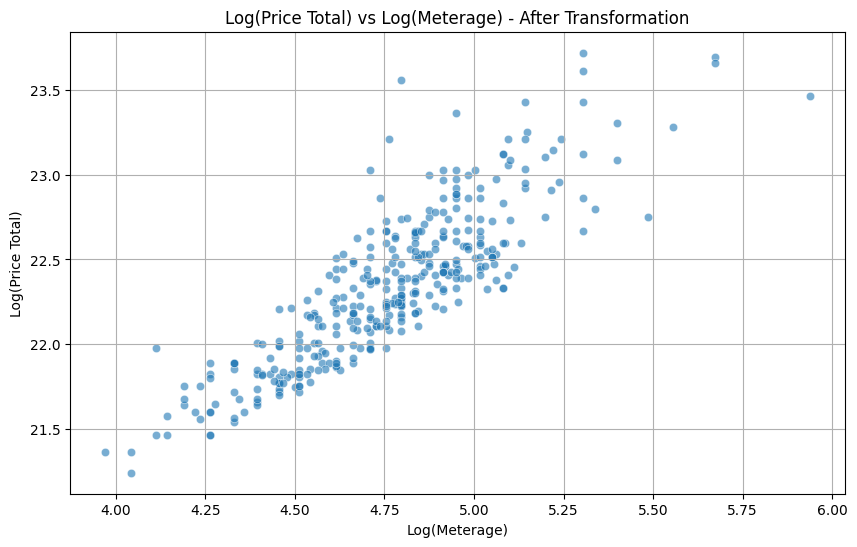


Model Results after Log Transformation:
Intercept: 16.17
Coefficient for Log(Meterage): 1.29
R²: 0.7526


In [ ]:
from data.data_cleaner import clean
df = clean(df)
df_cleaned = kluster(df)

# 1. تبدیلات لگاریتمی
df_cleaned['price_total_log'] = np.log1p(df_cleaned['price_total'])
df_cleaned['meterage_log'] = np.log1p(df_cleaned['meterage'])
df_cleaned['room_count_log'] = np.log1p(df_cleaned['room_count'])
df_cleaned['age_log'] = np.log1p(df_cleaned['age'])
# 2. رسم نمودار پراکندگی بعد از تبدیل
plt.figure(figsize=(10, 6))
sns.scatterplot(x='meterage_log', y='price_total_log', data=df_cleaned, alpha=0.6)
plt.title('Log(Price Total) vs Log(Meterage) - After Transformation')
plt.xlabel('Log(Meterage)')
plt.ylabel('Log(Price Total)')
plt.grid(True)
plt.show()

# 3.رگرسیون خطی

X = df_cleaned[['meterage_log','room_count','has_elevator','age','location_cluster_0','location_cluster_1','location_cluster_2','location_cluster_3','location_cluster_4','location_cluster_5','location_cluster_6','location_cluster_7']] # یا X = df_cleaned[['meterage_log', 'age_of_building_log', ...]]
y = df_cleaned['price_total_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 4. بررسی R² و Intercept
r2 = r2_score(y_test, y_pred)
intercept = model.intercept_
coefficient_meterage_log = model.coef_[0]

print(f"\nModel Results after Log Transformation:")
print(f"Intercept: {intercept:.2f}")
print(f"Coefficient for Log(Meterage): {coefficient_meterage_log:.2f}")
print(f"R²: {r2:.4f}")

# تفسیر Intercept: exp(intercept) قیمت پیش‌بینی شده برای متراژ 0 (log(meterage_log) = 0 یعنی meterage=0)
# این در مقیاس اصلی قیمت معنی‌دار نیست، اما در مقیاس لگاریتمی باید یک عدد مثبت و منطقی باشد.

# برای تفسیر نتایج در مقیاس اصلی (قیمت واقعی)، باید از np.expm1 استفاده کنید:
# predicted_prices_actual = np.expm1(y_pred)
# actual_prices_actual = np.expm1(y_test)